**Key and IV Management **

As you have seen, having a library such as cryptography makes all kinds of encryption convenient and simple to use. Unfortunately, this simplicity can be deceptive and lead to mistakes; there are many ways to get it wrong. We have already touched briefly on one of them: reuse of keys or IVs. That kind of mistake falls under the broader category of “Key and IV Management,” and doing it incorrectly is a common source of problems.

Nielson, Seth James; Monson, Christopher K.. Practical Cryptography in Python: Learning Correct Cryptography by Example (p. 129). Apress. Edição do Kindle.

**Important** You must never reuse key and IV pairs.



In [8]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend


import os

class EncryptionManager:
  def __init__(self):
      key = os.urandom(32)
      nonce = os.urandom(16)
      aes_context = Cipher(algorithms.AES(key),
                           modes.CTR(nonce),
                           backend=default_backend())
      self.encryptor = aes_context.encryptor()
      self.decryptor = aes_context.decryptor()

  def updateEncryptor(self, plaintext):
      return self.encryptor.update(plaintext)

  def finalizeEncryptor(self):
      return self.encryptor.finalize()

  def updateDecryptor(self, ciphertext):
      return self.decryptor.update(ciphertext)

  def finalizeDecryptor(self):
      return self.decryptor.finalize()

# Auto generate key/IV for encryption


manager = EncryptionManager()
plaintexts = [
    b"SHORT",
    b"MEDIUM MEDIUM MEDIUM",
    b"LONG LONG LONG LONG LONG LONG"
    ]

ciphertexts = []
for m in plaintexts:
    ciphertexts.append(manager.updateEncryptor(m))

ciphertexts.append(manager.finalizeEncryptor())

for c in ciphertexts:
    print("Recovered", manager.updateDecryptor(c))

print("Recovered", manager.finalizeDecryptor())


# Nielson, Seth James; Monson, Christopher K..
# Practical Cryptography in Python: Learning Correct Cryptography by Example (p. 127).
# Apress. Edição do Kindle.

Recovered b'SHORT'
Recovered b'MEDIUM MEDIUM MEDIUM'
Recovered b'LONG LONG LONG LONG LONG LONG'
Recovered b''
Recovered b''


Um Exemplo:

1 <XML>
2     <CreditCardPurchase>
3       <Merchant>Acme Inc</Merchant>
4       <Buyer>John Smith</Buyer>
5       <Date>01/01/2001</Date>
6       <Amount>$100.00</Amount>
7       <CCNumber>555-555-555-555</CCNumber>
8     </CreditCardPurchase>
9 </XML>




In [ ]:
#1 <XML>
#2     <CreditCardPurchase>
#3       <Merchant>Acme Inc</Merchant>
#4       <Buyer>John Smith</Buyer>
#5       <Date>01/01/2001</Date>
#6       <Amount>$100.00</Amount>
#7       <CCNumber>555-555-555-555</CCNumber>
#8     </CreditCardPurchase>
#9 </XML>



In [ ]:
# ACME generates a purchase message in their storefront.
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
# WARNING! Never do this. Reusing a key/IV is irresponsible!


preshared_key = bytes.fromhex('00112233445566778899AABBCCDDEEFF')
preshared_iv = bytes.fromhex('00000000000000000000000000000000')

purchase_message = b"""
 <XML>
      <CreditCardPurchase>
      <Merchant>Acme Inc</Merchant>
      <Buyer>John Smith</Buyer>
      <Date>01/01/2001</Date>
      <Amount>$100.00</Amount>
      <CCNumber>555-555-555-555</CCNumber>
      </CreditCardPurchase>
 </XML>
 """
 aesContext = Cipher(algorithms.AES(preshared_key),
                     modes.CTR(preshared_iv),
                     backend=default_backend())
 encryptor = aesContext.encryptor()
 encrypted_message = encryptor.update(purchase_message)



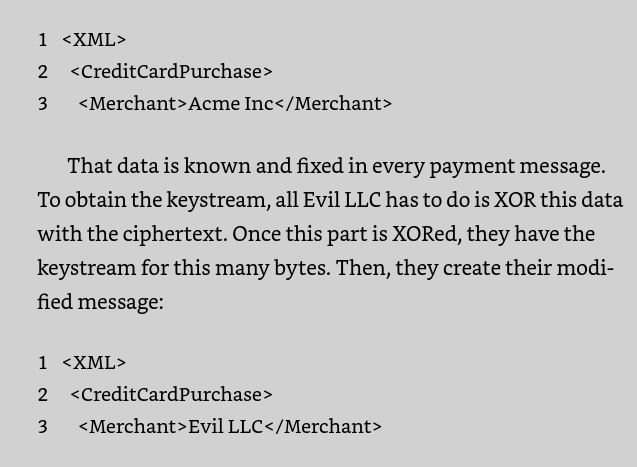

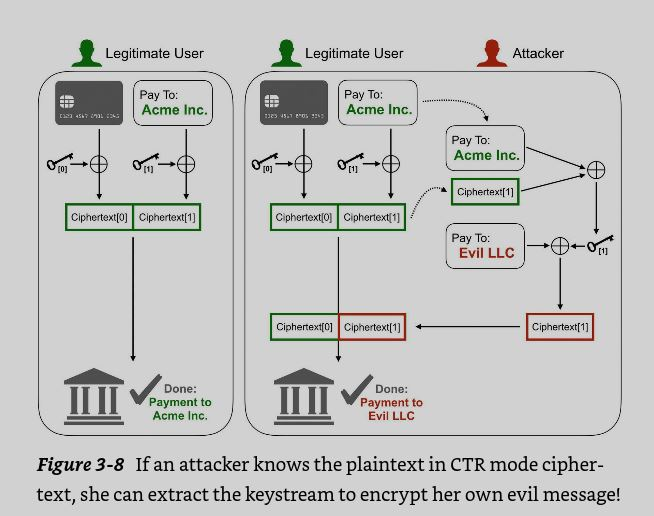